In [59]:
import pandas as pd
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
# from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
# import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm


Making points

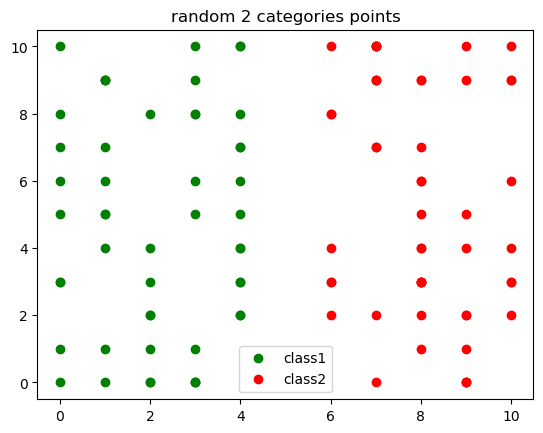

In [49]:
def points(domain):
    x1 = [random.randint(0,4) for _ in range(domain)]
    x2 = [random.randint(6,10) for _ in range(domain)]
    y1 = [random.randint(0,10) for _ in range(domain)]
    y2 = [random.randint(0,10) for _ in range(domain)]
    
    return x1, x2, y1, y2

domain = 50
x1, x2, y1, y2 = points(domain)

X = []
Y = []

f = open('my_points.txt', 'w')
f.write('x, y, class\n')

for i in range(domain):
    f.write(f"{x1[i]}, {y1[i]}, 0\n")
    X.append([x1[i], y1[i]])
    Y.append(0)

for i in range(domain):
    f.write(f"{x2[i]}, {y2[i]}, 1\n")
    X.append([x2[i], y2[i]])
    Y.append(1)

f.close() 

fig, ax = plt.subplots()


y1_draw, = plt.plot(x1, y1, 'o', color='green', label='class1')
y2_draw, = plt.plot(x2, y2, 'o', color='red', label='class2')

ax.set_title('random 2 categories points')

ax.legend(handles=[y1_draw, y2_draw])
name = "part1_points" + '.png'

plt.savefig(name)
plt.show()

In [50]:
X = np.asarray(X)
Y = np.asarray(Y)

Train & Test 

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 2) (80,)
Test set: (20, 2) (20,)


Modeling

In [52]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

Predicting

In [53]:
yhat = clf.predict(X_test)
yhat

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

Evaluation

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix, without normalization
[[14  0]
 [ 0  6]]


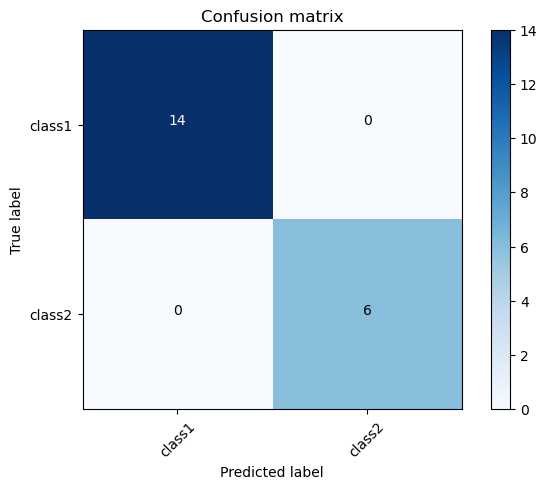

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class1', 'class2'], normalize= False, title='Confusion matrix')

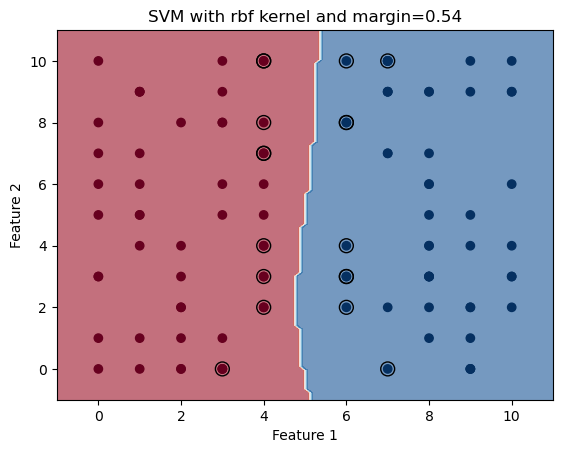

In [56]:
# Obtain the support vectors and dual coefficients
support_vectors = clf.support_vectors_
dual_coef = clf.dual_coef_

# Calculate the margin using the norm of the support vectors and dual coefficients
margin = 2 / np.sqrt(np.sum(dual_coef ** 2))

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margin
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"SVM with {clf.kernel} kernel and margin={margin:.2f}")
plt.show()

In [61]:
Categories=['2','3','7', 'S', 'W']

In [62]:
flat_data_arr=[]
target_arr=[]

datadir='.\\persian_LPR'
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : 2
loaded category:2 successfully
loading... category : 3
loaded category:3 successfully
loading... category : 7
loaded category:7 successfully
loading... category : S
loaded category:S successfully
loading... category : W
loaded category:W successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.344857,0.344857,0.344857,0.343042,0.343042,0.343042,0.341226,0.341226,0.341226,0.339411,...,0.141937,0.141937,0.141937,0.134266,0.134266,0.134266,0.126594,0.126594,0.126594,0
1,0.394462,0.394462,0.394462,0.386444,0.386444,0.386444,0.378427,0.378427,0.378427,0.370410,...,0.036801,0.036801,0.036801,0.035315,0.035315,0.035315,0.033828,0.033828,0.033828,0
2,0.350315,0.350315,0.350315,0.346578,0.346578,0.346578,0.342841,0.342841,0.342841,0.339104,...,0.195019,0.195019,0.195019,0.196781,0.196781,0.196781,0.198544,0.198544,0.198544,0
3,0.242188,0.242188,0.242188,0.240186,0.240186,0.240186,0.238184,0.238184,0.238184,0.236182,...,0.247299,0.247299,0.247299,0.247852,0.247852,0.247852,0.248404,0.248404,0.248404,0
4,0.382394,0.382394,0.382394,0.380018,0.380018,0.380018,0.377642,0.377642,0.377642,0.375266,...,0.222225,0.222225,0.222225,0.222919,0.222919,0.222919,0.223614,0.223614,0.223614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.092700,0.092700,0.092700,0.092140,0.092140,0.092140,0.091579,0.091579,0.091579,0.091019,...,0.070257,0.070257,0.070257,0.072125,0.072125,0.072125,0.073994,0.073994,0.073994,4
1496,0.162694,0.162694,0.162694,0.160265,0.160265,0.160265,0.157836,0.157836,0.157836,0.155407,...,0.180268,0.180268,0.180268,0.183988,0.183988,0.183988,0.187709,0.187709,0.187709,4
1497,0.176437,0.176437,0.176437,0.179454,0.179454,0.179454,0.182471,0.182471,0.182471,0.185489,...,0.181248,0.181248,0.181248,0.180038,0.180038,0.180038,0.178827,0.178827,0.178827,4
1498,0.071503,0.071503,0.071503,0.071503,0.071503,0.071503,0.071503,0.071503,0.071503,0.071503,...,0.086060,0.086060,0.086060,0.087181,0.087181,0.087181,0.088302,0.088302,0.088302,4


In [63]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)
print('Splitted Successfully')

Train set: (1200, 67500) (1200,)
Test set: (300, 67500) (300,)
Splitted Successfully


In [65]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [66]:
yhat = clf.predict(x_test)
yhat

array([2, 0, 2, 3, 3, 4, 1, 1, 2, 4, 4, 4, 3, 2, 0, 1, 1, 2, 1, 4, 3, 3,
       4, 3, 1, 4, 4, 2, 4, 1, 3, 1, 0, 4, 1, 1, 2, 3, 1, 3, 0, 2, 1, 4,
       4, 2, 1, 3, 3, 4, 2, 3, 4, 3, 2, 2, 0, 0, 2, 4, 1, 3, 0, 4, 0, 2,
       0, 2, 1, 3, 2, 4, 0, 0, 2, 2, 3, 2, 3, 2, 3, 3, 0, 4, 1, 1, 3, 4,
       0, 4, 3, 0, 4, 3, 1, 2, 1, 0, 1, 2, 2, 2, 4, 4, 4, 4, 0, 0, 3, 3,
       3, 3, 4, 4, 2, 1, 1, 1, 0, 4, 1, 4, 0, 0, 1, 4, 4, 4, 1, 3, 1, 4,
       1, 3, 1, 0, 3, 4, 0, 1, 4, 4, 0, 1, 1, 1, 3, 3, 0, 2, 4, 1, 4, 3,
       0, 3, 4, 3, 2, 1, 0, 0, 3, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 0, 2, 1,
       4, 4, 1, 1, 3, 0, 1, 4, 4, 4, 2, 1, 4, 4, 4, 0, 1, 3, 3, 4, 2, 2,
       2, 0, 2, 4, 3, 1, 2, 3, 2, 3, 1, 2, 0, 0, 3, 2, 2, 0, 2, 3, 2, 1,
       2, 0, 3, 0, 0, 2, 3, 0, 3, 3, 1, 4, 4, 3, 1, 4, 2, 2, 0, 0, 0, 0,
       1, 4, 0, 0, 1, 0, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 3, 4, 4,
       0, 3, 0, 2, 0, 4, 1, 0, 0, 1, 3, 1, 2, 0, 0, 1, 0, 1, 1, 4, 3, 4,
       0, 4, 0, 3, 2, 1, 1, 3, 1, 1, 4, 4, 0, 2])

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize = True,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.94      1.00      0.97        60
           2       0.98      0.98      0.98        60
           3       0.95      0.93      0.94        60
           4       0.93      0.95      0.94        60

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[55  4  1  0  0]
 [ 0 60  0  0  0]
 [ 1  0 59  0  0]
 [ 0  0  0 56  4]
 [ 0  0  0  3 57]]


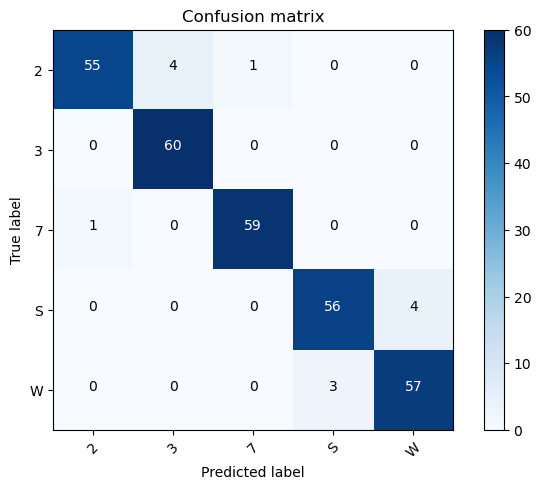

In [68]:
# Compute confusion matrix, to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
np.set_printoptions(precision=5)

print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['2', '3', '7', 'S', "W"], normalize=False, title='Confusion matrix')